<a href="https://colab.research.google.com/github/shauryashivam/PR-Assignment-1/blob/main/Answer_2_Bank_Notes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PATTERN RECOGNITION ASSIGNMENT 1**

# **CO-324**

## **2021 Semester VI**

## **Submitted to: Sh. Anurag Goel**
### **Submitted By: Saksham Gera (2K18/EE/179) & Shivam Shaurya(2K18/EE/194)**


# **ANSWER 2: BANK NOTES CLASSIFICATION** 

## **Required Libraries:**

## **Numpy**


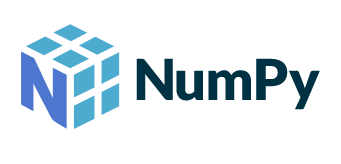

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Documentation Link: https://numpy.org/doc/stable/contents.html

### **Pandas** 

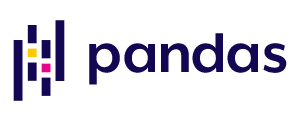

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Documentation Link: https://pandas.pydata.org/docs/


### **Sci-Kit Learn**

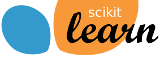

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

Documentation Link: https://scikit-learn.org/stable/


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

**About the Dataset**

The data is available in .csv file where each line corresponds to a bank note and the five values, separated by commas, are, in order, the four features (variance, skewness and kurtosis of Wavelet Transformed image and the entropy of the bank note image) and the class label, an integer with values 0 for real bank notes and 1 for fake bank notes.


In [36]:
url='https://raw.githubusercontent.com/shauryashivam/PR-Assignment-1/main/dataset.csv'
df=pd.read_csv(url, names=['variance','skewness','kurtosis','entropy','class'])

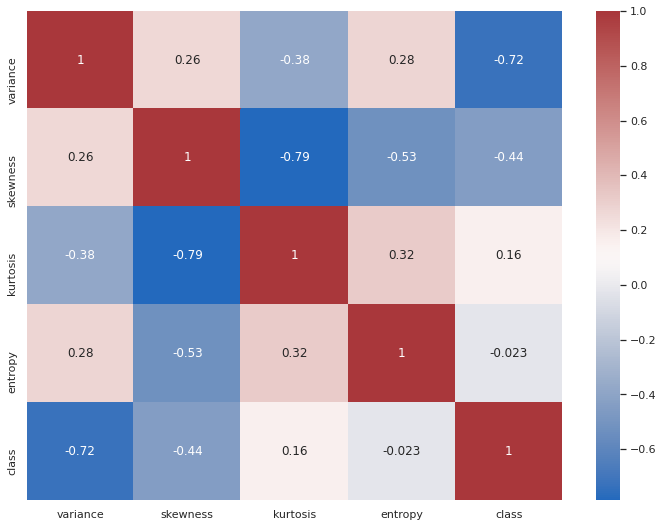

In [37]:
correlation_matrix =df.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='vlag')

In [38]:
sns.set_theme(rc={'figure.figsize':(12,9)})

In [39]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


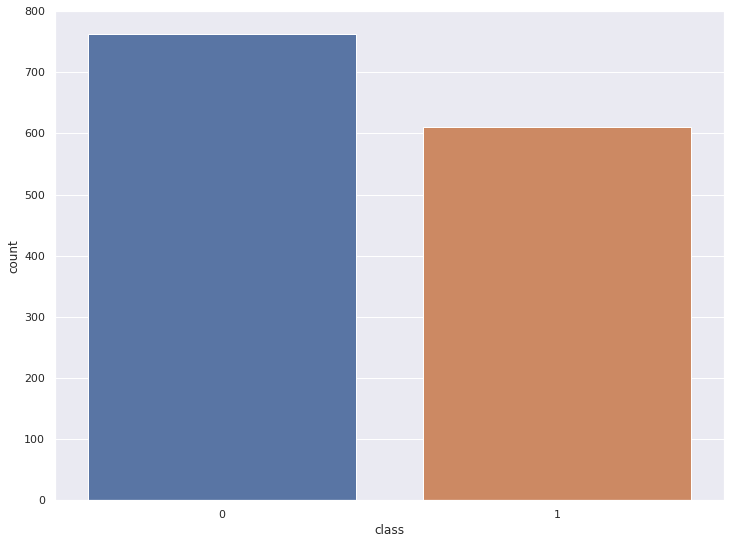

In [40]:
sns.countplot(x ='class', data=df)

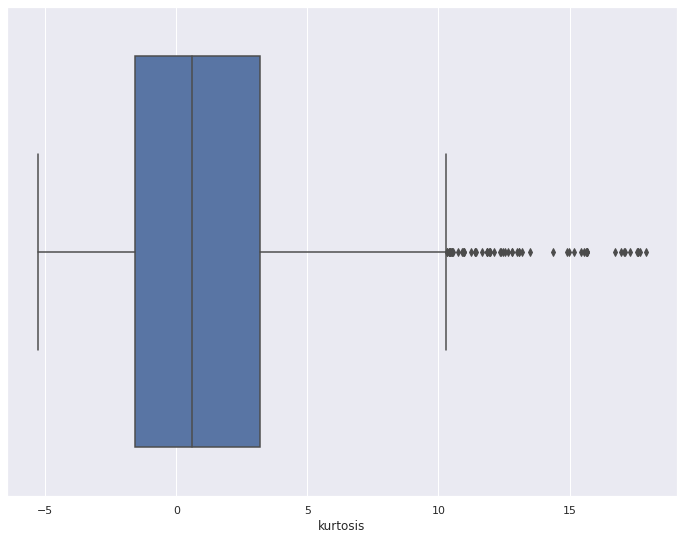

In [41]:
bp1 = sns.boxplot(x='kurtosis',data=df) # Notice the Large No. of Outliers

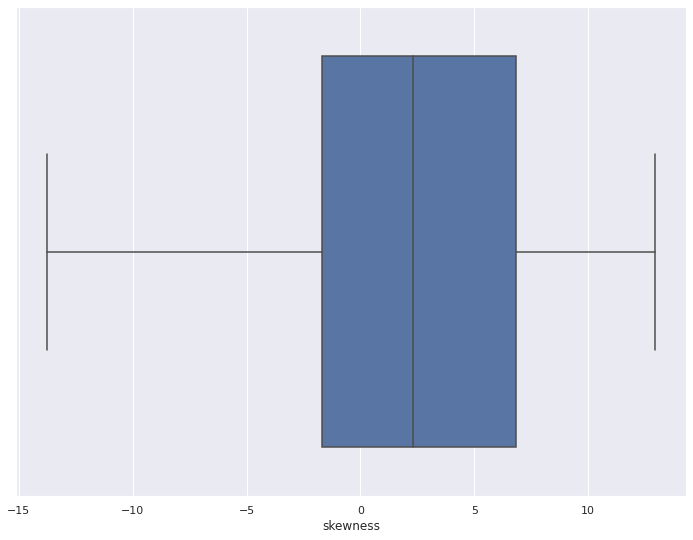

In [42]:
bp2 = sns.boxplot(x='skewness',data=df) 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


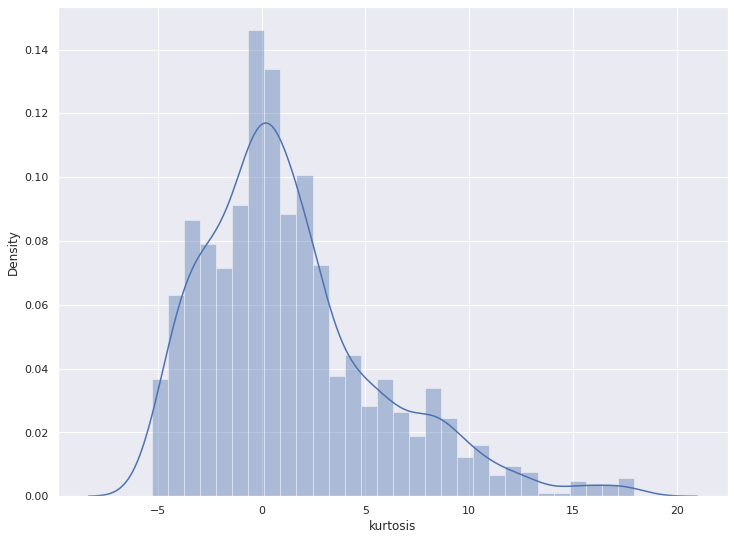

In [43]:

sns.distplot(df['kurtosis'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


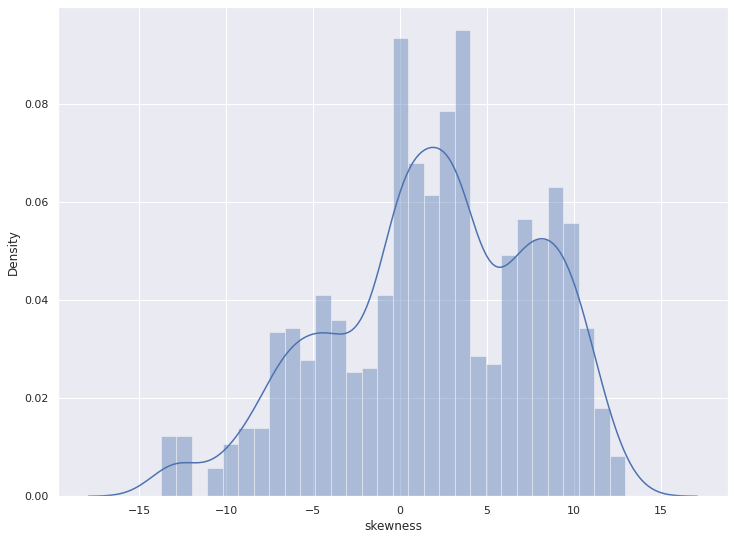

In [44]:
sns.distplot(df['skewness'], bins=30)





### **For Prior  = [0.1,0.9]**

In [45]:
train, test = train_test_split(df, test_size=0.5)

In [46]:
x_train=train.iloc[:,:-1]
x_train

,variance,skewness,kurtosis,entropy
983,-2.03360,-1.4092,1.15820,0.36507
396,2.67990,3.1349,0.34073,0.58489
197,1.91570,6.0816,0.23705,-2.01160
887,-3.26920,-12.7406,15.55730,-0.14182
1303,-3.92970,-6.0816,10.09580,-1.01470
...,...,...,...,...
1083,-0.69879,-3.3771,4.12110,1.50430
75,2.30660,3.5364,0.57551,0.41938
1139,-1.52280,-6.4789,5.75680,0.87325
79,1.13170,3.9647,3.39790,0.84351


In [47]:
y_train=train.iloc[:,4]
y_train

983     1
396     0
197     0
887     1
1303    1
       ..
1083    1
75      0
1139    1
79      0
270     0
Name: class, Length: 686, dtype: int64

In [48]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,4]

In [49]:
x_train.to_numpy()
x_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [50]:
nb_model=GaussianNB(priors=[0.1,0.9])

In [51]:
fit_nb=nb_model.fit(x_train,y_train)

In [52]:
prediction=fit_nb.predict(x_test)
con_matrix=confusion_matrix(y_test,prediction)
print(con_matrix)

[[250 132]
 [  3 301]]


In [53]:
def diagonal_sum(con_matrix):
  sum=0
  totalSum=0
  for i in range(2):
    for j in range(2):
      totalSum+=con_matrix[i][j]
      if i==j:
        sum+=con_matrix[i][j]
  return sum,totalSum

In [54]:
sum,totalSum=diagonal_sum(con_matrix)
print(sum,totalSum)

551 686


In [55]:
print(f'Accuracy % : {sum/totalSum}')

Accuracy % : 0.8032069970845481


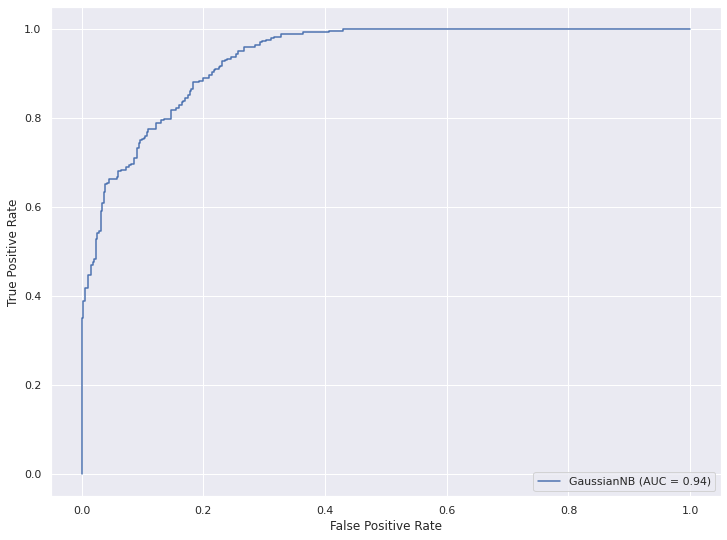

In [56]:
metrics.plot_roc_curve(fit_nb, x_test, y_test)
plt.show()  

### **For Priori = [0.5,0.5]**

In [57]:
url='https://raw.githubusercontent.com/killer4639/bank-note-authentication/master/data.csv'
df1=pd.read_csv(url)

In [58]:
df1.head()

,0.37637,-0.82358,0.78543,0.74524,1
0,3.24030,-3.70820,5.28040,0.41291,0
1,3.58290,1.44230,1.02190,1.40080,0
2,0.86202,2.69630,4.29080,0.54739,0
3,-0.21661,8.03290,1.88480,-3.88530,0
4,0.11806,0.39108,-0.98223,0.42843,1


In [59]:
train, test = train_test_split(df1, test_size=0.2)

In [60]:
x_train=train.iloc[:,:-1]
x_train

,0.37637,-0.82358,0.78543,0.74524
166,-1.75890,-6.4624,8.47730,0.31981
681,-2.23400,-7.0314,7.49360,0.61334
889,-3.50600,-12.5667,15.16060,-0.75216
1122,-1.66370,3.2881,-2.27010,-2.22240
389,2.82090,7.3108,-0.81857,-1.87840
...,...,...,...,...
629,1.02350,6.9010,-2.00620,-2.71250
379,0.32920,-4.4552,4.57180,-0.98880
833,-0.89542,2.0279,-2.36520,-1.27460
679,2.55030,-4.9518,6.37290,-0.41596


In [61]:
y_train=train.iloc[:,4]
y_train

166     1
681     1
889     1
1122    1
389     0
       ..
629     0
379     0
833     1
679     0
1355    0
Name: 1, Length: 1096, dtype: int64

In [62]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,4]

In [63]:
x_train.shape

(1096, 4)

In [64]:
nb_model=GaussianNB(priors=[0.5,0.5])

In [65]:
fit_nb=nb_model.fit(x_train,y_train)


In [66]:
prediction=fit_nb.predict(x_test)
con_matrix=confusion_matrix(y_test,prediction)
print(con_matrix)

[[144  14]
 [ 19  98]]


In [67]:
def diagonal_sum(con_matrix):
  sum=0
  totalSum=0
  for i in range(2):
    for j in range(2):
      totalSum+=con_matrix[i][j]
      if i==j:
        sum+=con_matrix[i][j]
  return sum,totalSum

In [68]:
sum,totalSum=diagonal_sum(con_matrix)
print(sum,totalSum)

242 275


In [69]:
print(f'Accuracy % : {sum/totalSum}')

Accuracy % : 0.88


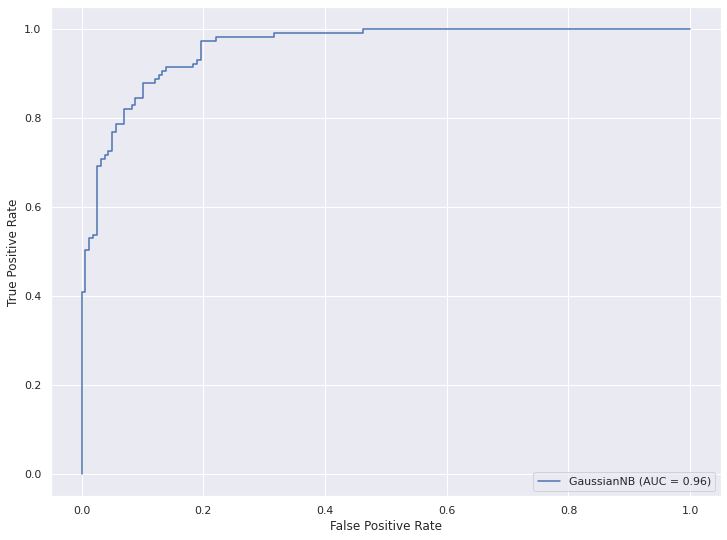

In [70]:
metrics.plot_roc_curve(fit_nb, x_test, y_test)
plt.show()  